<a href="https://colab.research.google.com/github/felipe-mesa/Machine_Learning_Python/blob/master/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Leer el set de datos
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [4]:
#Separa el dataset en una matriz X de variables independientes y un vector y de la variable dependiente
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
###DIVIDIR EL SET EN TRAINING SET Y TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [6]:
#FEATURE SCALING (ESCALADOR)
from sklearn.preprocessing import StandardScaler
#Calcula media y std y la aplica al dataset, no a las variables dummy
sc = StandardScaler()

#(Recordar que X_train es un arreglo numpy)
X_train  = sc.fit_transform(X_train)
#Hay que usar el mismo escalador en el train set y el test set, NO hay que usar fit ya que se hizo un fit en el train set
X_test  = sc.transform(X_test)

In [8]:
#Entrenar el modelo
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
#Predecir nuevos valores. Recordar que se uso un escalador, por lo que hay que transformar nuevos valores. Recordar parentesis
print(clf.predict(sc.transform([[30,87000]])))

[0]


In [10]:
#Predecir el test set
y_pred = clf.predict(X_test)

In [12]:
#Matriz de confusion para evaluar el modelo
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[51  7]
 [ 7 35]]


0.86

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


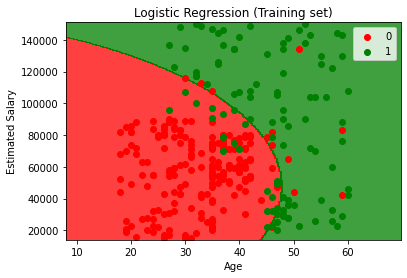

In [13]:
#Visualizar los resultados del training set (este codigo solo sirve para 2 variables)
#Probablemente esta visualizacion no la use mucho
#Se puede ver por la linea que separa el plano, que la logistic regression funciona como un modelo lineal
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


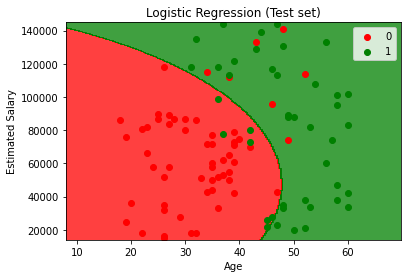

In [14]:
#Visualizar los resultados del test set (este codigo solo sirve para 2 variables)
#Probablemente esta visualizacion no la use mucho
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()